<a href="https://colab.research.google.com/github/ebamberg/research-projects-ml/blob/main/visualization_examples_t_sne_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!wget -O mnist_train.csv https://pjreddie.com/media/files/mnist_train.csv

--2024-12-28 11:29:53--  https://pjreddie.com/media/files/mnist_train.csv
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109575994 (104M) [text/csv]
Saving to: ‘mnist_train.csv’

mnist_train.csv     100%[===================>] 104.50M  34.2MB/s    in 3.4s    

2024-12-28 11:29:56 (31.2 MB/s) - ‘mnist_train.csv’ saved [109575994/109575994]



In [34]:
# Importing Necessary Modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sn




In [29]:
# Reading the data using pandas
df = pd.read_csv('mnist_train.csv')

# print first five rows of df
print(df.head(4))

# save the labels into a variable l.
l = df.iloc[:, 0]

# Drop the label feature and
# store the pixel data in d.
d = df.drop(df.columns[0], axis=1)
print(d.head(4))



   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  

[4 rows x 785 columns]
   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.608  0.609  0.610  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0

In [30]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)




(59999, 784)


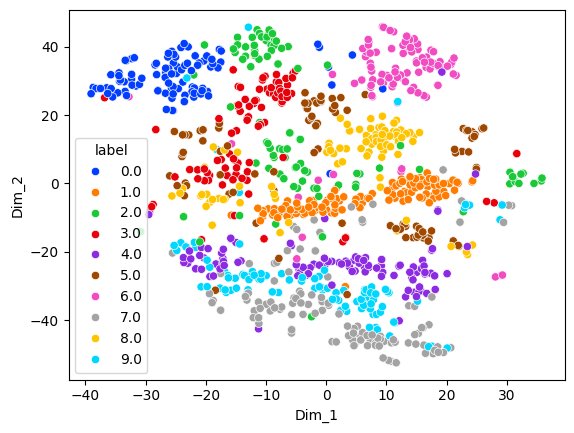

In [35]:
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
data_1000 = standardized_data[0:1000, :]
labels_1000 = l[0:1000]

model = TSNE(n_components = 2, random_state = 0)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000

tsne_data = model.fit_transform(data_1000)

# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
	columns =("Dim_1", "Dim_2", "label"))

# Plotting the result of tsne
sn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
			hue='label', palette="bright")
plt.show()
